# Compte rendu traitement de données informatique

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dans ce notebook, nous allons étudier la distance domicile travail dans plusieurs villes françaises, ainsi que la population active, et leurs évolutions depuis 1999. Nous étudierons également le lien avec la situation économique de la population dans ces mêmes villes, ce qui comptera pour une bonne partie du projet.

In [ ]:
df = pd.read_csv('Figure_4b.csv')
df2 = pd.read_csv('Figure_4.csv')
fusion_df = pd.merge(df, df2, left_on='Commune_Name', right_on='Libelle_commune_2022', how='inner')
fusion_df.to_csv('fichier_fusionne.csv', index=False)

Nous avons trouvé des données sur le site de l'Insee.
Afin de croiser les deux tableaux de données, nous les avons d'abord fusionnés en un seul dataframe.

## Evolution de la distance domicile travail entre 1999 et 2019

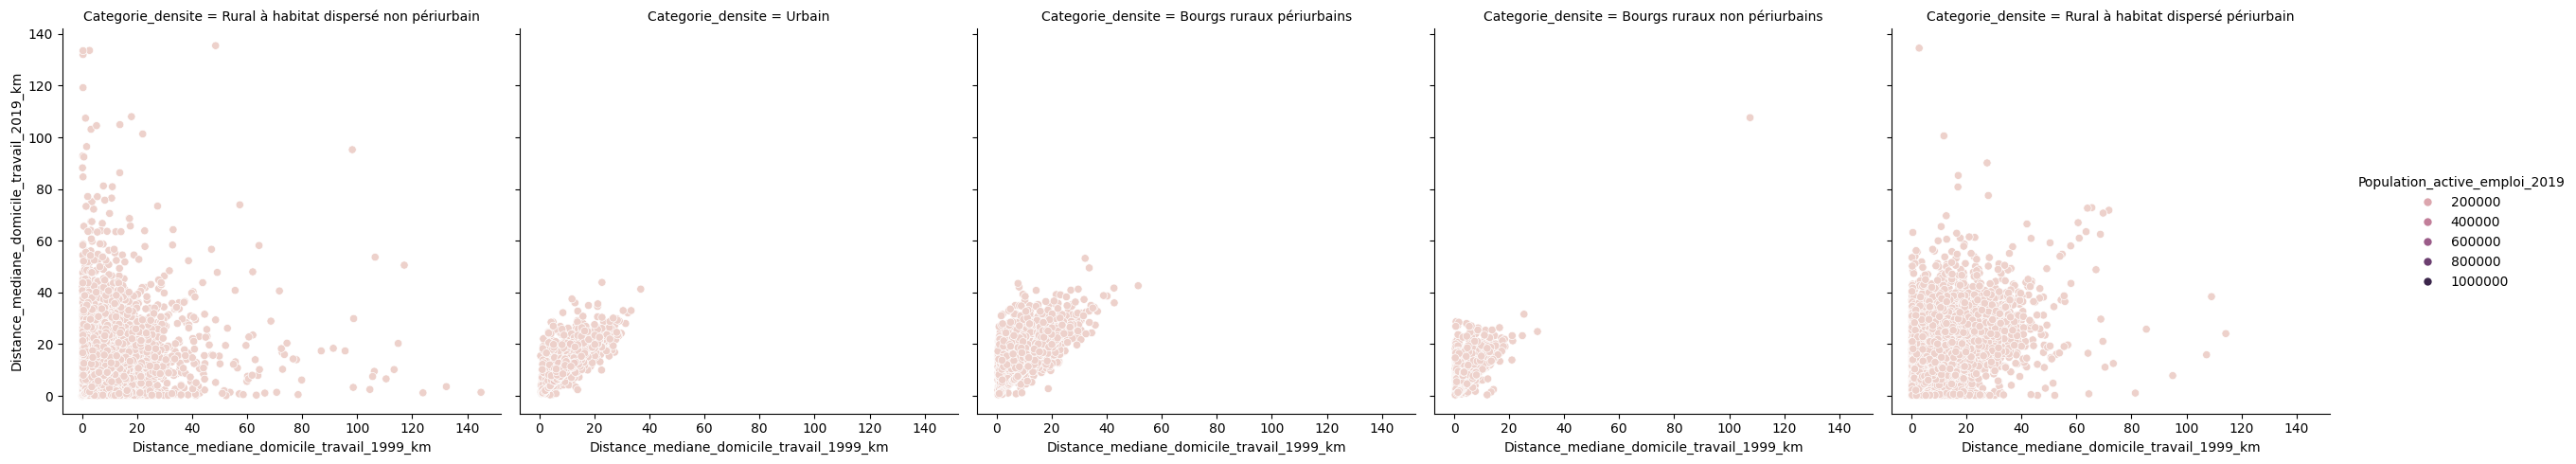

In [ ]:
sns.relplot(data=df2, x='Distance_mediane_domicile_travail_1999_km', y='Distance_mediane_domicile_travail_2019_km', 
            col='Categorie_densite', hue='Population_active_emploi_2019',
           );

Ce graphique montre que globalement les distances parcourues pour aller au travail n'ont pas évolué en moyenne. Seulement en ville (orange) la variance entre ces 2 périodes a été très faible.

## Evolution de la population active entre 1999 et 2019

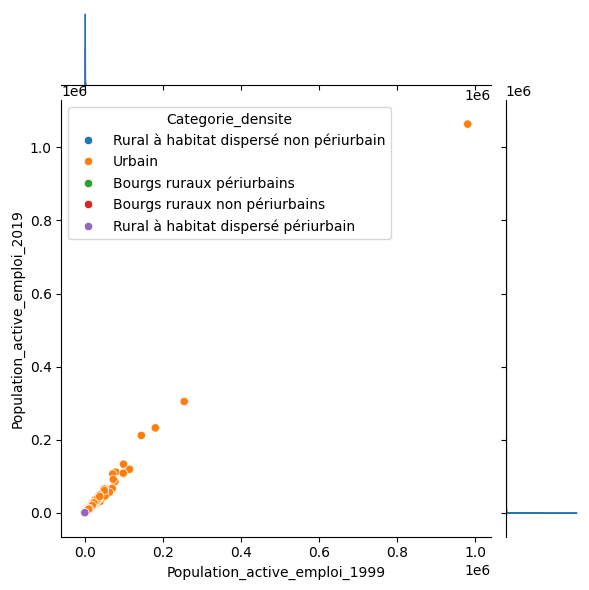

In [ ]:
sns.jointplot(
    data=df2,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Globalement, la population active n’a pas l’air d’avoir changée depuis 1999. Mais les données sont concentrées sur les faibles populations actives. Donc l’échelle proposée est faussée par les villes à très grande population active.

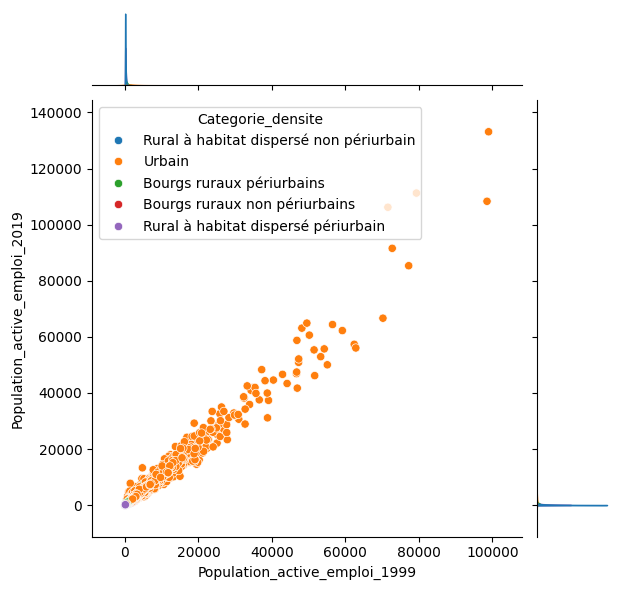

In [ ]:
df3 = df2[df2["Population_active_emploi_1999"]<1e5] #On masque les villes avec plus de 100000 actifs
sns.jointplot(
    data=df3,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

On observe alors qu’en fait la population active a légèrement augmenté. Cependant, on observe toujours uniquement les données du milieu urbain.

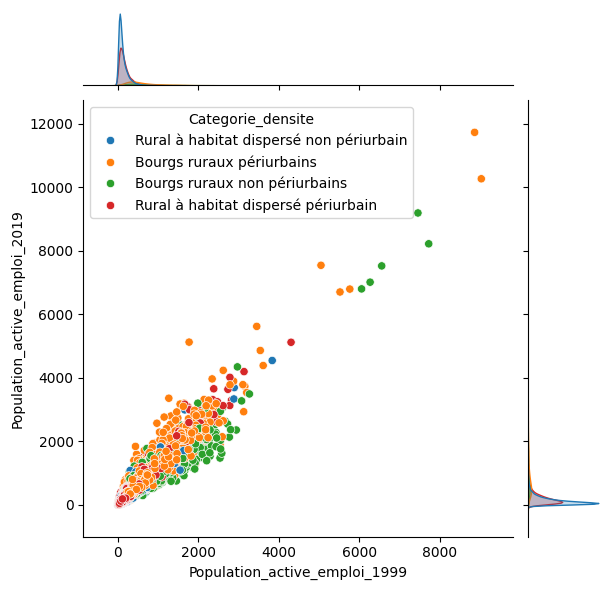

In [ ]:
df4 = df3[df3["Categorie_densite"]!="Urbain"] #On masque les villes en milieur urbain
sns.jointplot(
    data=df4,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Hors milieu urbain, on observe une hausse de la population active pour quelques communes. Mais la plupart des communes ont une population active de moins de 2000 et on voit mal la répartition dans cette zone.

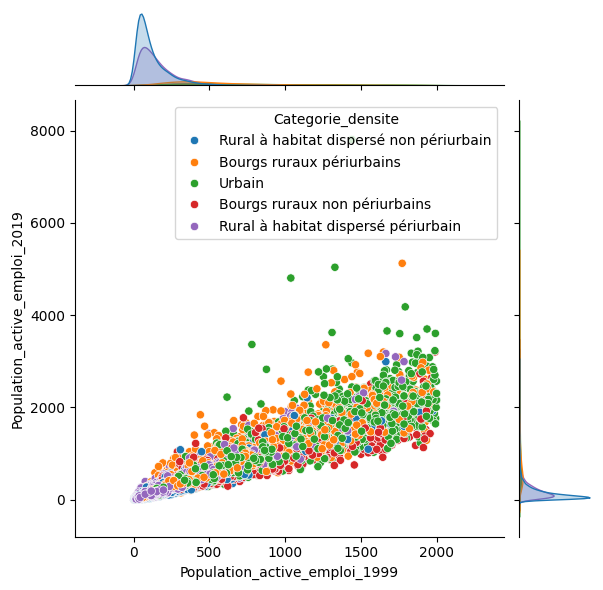

In [ ]:
df5 = df2[df2["Population_active_emploi_1999"]<2000] #On s'intéresse uniquement aux communes de population active inférieure à 2000
sns.jointplot(
    data=df5,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

En zoomant, on voit que la plupart des communes qui avait moins de 2000 actifs en 1999 en ont toujours moins de 2000 en 2019. Mais certaines ont grandit jusqu’à environ 5000 actifs.

## Distance domicile-travail en fonction du milieu urbain (en 2019 ainsi qu'en 1999)

On peut ensuite observer la distance domicile-travail des personnes en fonction de leur milieu géographique (urbain, périurbain, rural,...). Pour cela on va réaliser la moyenne (parmis toutes les communes de chaque catégorie) de la médiane de la distance domicile-travail (faute d'avoir une base de données nous permettant de faire la moyenne au niveau de tous les habitants de ce type de lieu).

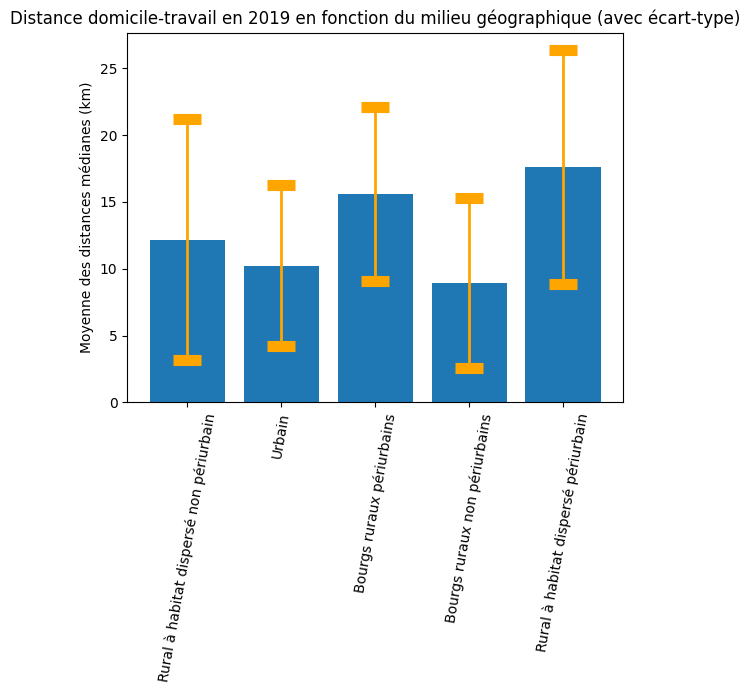

In [ ]:
a=df2['Categorie_densite'].unique()
moy=[]
ecart=[]
categories=[]
for i in a :
    df_=df2[df2['Categorie_densite']==i]
    m=np.mean(df_['Distance_mediane_domicile_travail_2019_km'])
    e=np.std(df_['Distance_mediane_domicile_travail_2019_km'])
    moy.append(m)
    categories.append(i)
    ecart.append(e)
categories.pop()
moy.pop()
ecart.pop()
plt.bar(categories,moy)
plt.errorbar(categories,moy,yerr=ecart,fmt = 'none', capsize = 10, ecolor = 'orange', elinewidth = 2, capthick = 8)
plt.xticks(rotation=80)
plt.title('Distance domicile-travail en 2019 en fonction du milieu géographique (avec écart-type)')
plt.ylabel('Moyenne des distances médianes (km)')
plt.show()

On observe ainsi que les moyennes de chaque milieu sont comprises entre 8 et 18km, ce que permettent les modes de transport rapides que l'on a aujourd'hui (voiture, train, bus). Elles sont les plus faibles pour deux extrêmes : les zones urbaines, et les bourgs ruraux non périurbains. Cela se comprend aisément : les zone urbaine sont denses et il y a des lieux de travail partout au centre de la ville, donc à proximité. Quant aux bourgs ruraux non périurbains, ils sont trop loins d'une grande ville pour que les habitants y travaillent, ainsi ces derniers travaillent principalement dans le bourg lui-même (qui offre des opportunités de travail) ou dans des bourgs voisins. Pour deux raisons différentes, les distances y sont plus faibles que dans le périurbain.
L'écart-type est très élevé car chaque milieu urbain décrit un vaste groupe de communes qui ont chacunes leurs propres caractéristiques.

Observons désormais la tendance qui était en place en 1999 (vingt ans plus tôt).

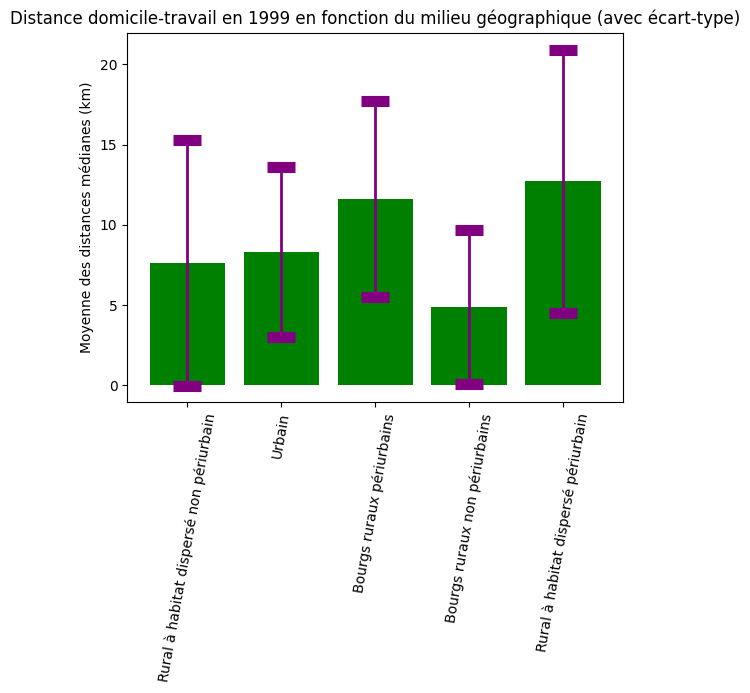

In [ ]:
a=df2['Categorie_densite'].unique()
moy=[]
ecart=[]
categories=[]
for i in a :
    df_=df2[df2['Categorie_densite']==i]
    m=np.mean(df_['Distance_mediane_domicile_travail_1999_km'])
    e=np.std(df_['Distance_mediane_domicile_travail_1999_km'])
    moy.append(m)
    categories.append(i)
    ecart.append(e)
categories.pop()
moy.pop()
ecart.pop()
plt.bar(categories,moy,color='green')
plt.errorbar(categories,moy,yerr=ecart,fmt = 'none', capsize = 10, ecolor = 'purple', elinewidth = 2, capthick = 8)
plt.xticks(rotation=80)
plt.title('Distance domicile-travail en 1999 en fonction du milieu géographique (avec écart-type)')
plt.ylabel('Moyenne des distances médianes (km)')
plt.show()

On observe à peu près le même ordre des milieu urbain en fonction du nombre de kilomètres, pour les mêmes raisons. Les valeurs sont à peu près translatées de 5km vers le bas par rapport à 2019. Cela est peut-être dû au fait que les transports étaient moins rapides il y a 20 ans (depuis, on a pu assister au développement de nouvelles autoroutes, LGV...). On observe aussi que dans une partie des communes rurales, les gens travaillaient en grande majorité à côté de chez eux (d'après l'écart-type descendant jusqu'à 0km). En seulement 20 ans, cette tendance a bien diminué, par comparaison des deux graphiques. Cela illustre l'augmentation de l'interconnectivité des villes, ainsi que l'attraction de plus en plus forte de certains pôles urbains.

## Population active en fonction de la densité

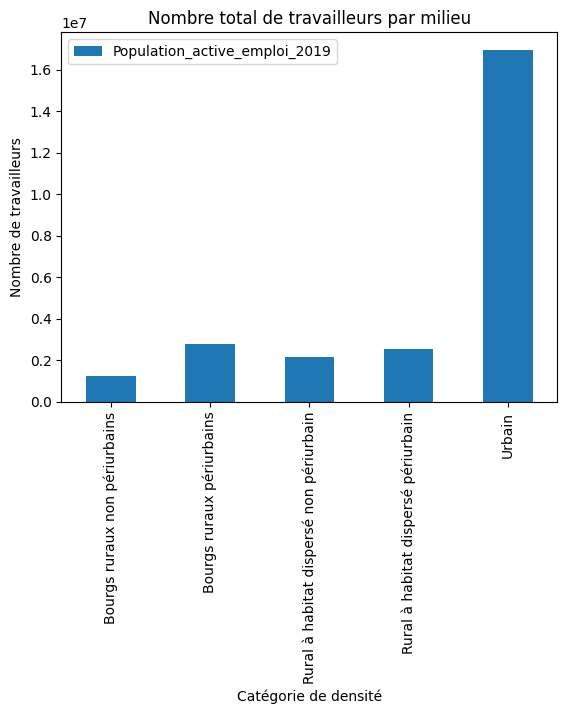

In [ ]:
df2population = df2[['Population_active_emploi_2019', 'Categorie_densite']]

by_method = df2population.groupby('Categorie_densite')

counts = by_method.sum()
counts.plot(kind='bar')

plt.title('Nombre total de travailleurs par milieu')
plt.xlabel('Catégorie de densité')
plt.ylabel('Nombre de travailleurs')


# Affichage
plt.show()

On s’intéresse tout d’abord au nombre de travailleurs par catégorie de densité.

Les villes sont bien sûr en tête aevc plus de 10 milions d’actifs, et toutes les zones périurbaines sont de l’ordre du million.

Cela est cohérent avec la répartition de la population française, dans une grande majorité citadine.

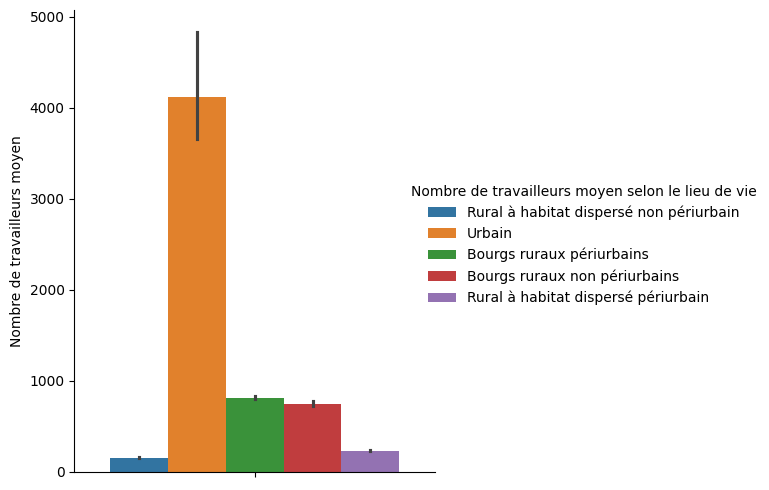

In [ ]:
g = sns.catplot(
    data=df2population, kind="bar",
    hue="Categorie_densite", y="Population_active_emploi_2019")
g.set_axis_labels("", "Nombre de travailleurs moyen")
g.legend.set_title("Nombre de travailleurs moyen selon le lieu de vie")

On représente ici les effectifs de population active en fonction da catégirie de densité de l’endroit où les personnes habitent. On remarque sans surprise que ce sont les zones urbaines qui l’emportent avec plus de 4000 travailleurs par commune. De plus, les zones avec la plus faible densité de population sont les zones où il y a le moins de travailleurs.

On remarque également que pour les villes l’incertitude est la plus haute, et plus vers les hautes populations : il y a en effet des villes de taille très variées (dont de très grosses) ce qui augmente cette valeur.

## Tentatives de liens avec un second tableau de l'INSEE


On cherche à faire le lien entre le premier tableau contenant des infomations de densité, population et distances au travail, avec celui caractérisant les part de populations en deça du seuil de pauvreté.
On pourrait, à première vue, supposer qu'un lien existe entre ces deux quantités et que des ménages plus faibles existent dans les zones où le travail se situe plus loin du lieu de vie. Cependant dans les cas mesurés, cet effet pourrait être contrbalancé par le fait que trvailler loin nécessite d'avoir assez d'argent pour se déplacer.

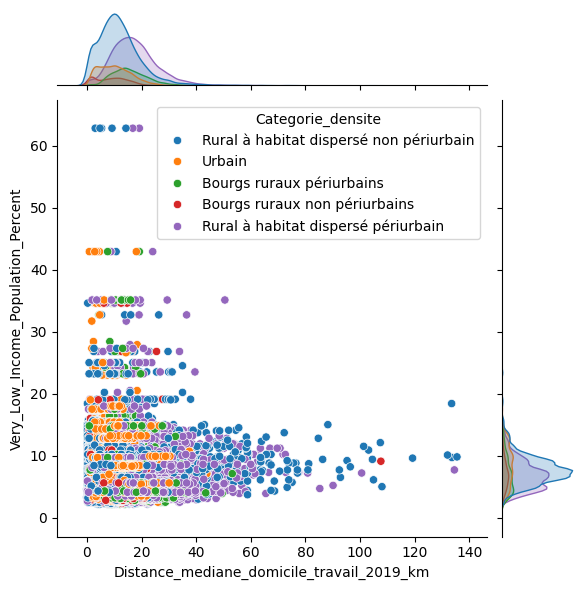

In [ ]:
sns.jointplot(
    data=fusion_df,
    x='Distance_mediane_domicile_travail_2019_km',
    y='Very_Low_Income_Population_Percent',
     hue='Categorie_densite');

On essaie donc de tracer un graphique liant les populations à très faibles revenus à la distance domicile travail.

Ce graphique semble solder par un échec nos premières prédictions, qui se traduiraient par une forme de graphe plutôt linéaire ; le graphe ne l'est pas du tout.

Nous avions négligé dans nos considérations l'importance des banlieues, qui sont des zones urbaine, dans les populations qui peuvent avoir de courtes distances à parcourir mais de faibles revenus. 

Ajoutons également que la donnée de proportion de la population à très faible revenus n'est pas le seul indicateur de pauvreté d'un lieu, et que cela ne donne pas la tendance génnérale de la ville considérée. On pourrait avoir beaucoup de "très pauvres" et beaucoup de "très riches" dans une même ville, et nos graphes ne sont pas en mesure de faire des distinctions sur ces considérations.

On essaie tout de même de faire un autre graphe de ce type.

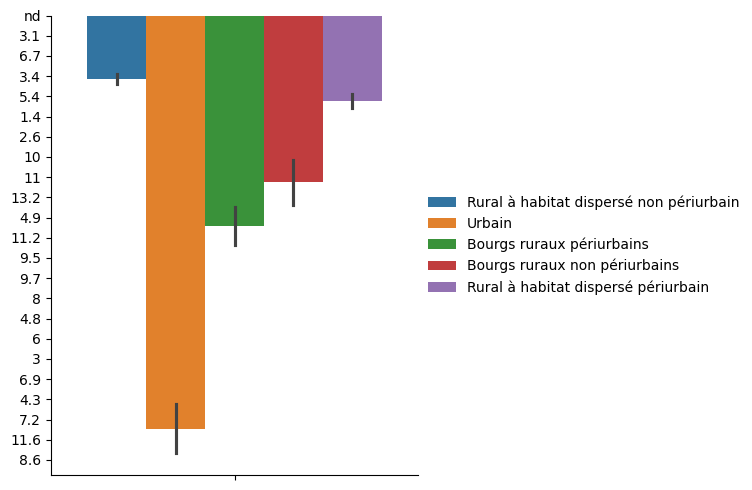

In [ ]:
df3 = fusion_df[['Very_Low_Income_Population_Count', 'Categorie_densite']]

g = sns.catplot(
    data=df3, kind="bar",
    hue="Categorie_densite", y="Very_Low_Income_Population_Count")
g.set_axis_labels("", "")
g.legend.set_title("")

Les populations les plus pauvres sont bien dans les villes urbanisées, comme on a pu le supposer par la suite !

D'où la non corrélation entre les distances domicile-travail et les plus bas revenus. Que nous n'avons pas pu observer. 